<a href="https://colab.research.google.com/github/genilaura-g/JP-Morgan-Job-Simulation-/blob/main/JP_Morgan_Quant_Researcher_Simulation_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JP Morgan - Quant Researcher Simulation

You need to create a prototype pricing model that can go through further validation and testing before being put into production. Eventually, this model may be the basis for fully automated quoting to clients, but for now, the desk will use it with manual oversight to explore options with the client.

You should write a function that is able to use the data you created previously to price the contract. The client may want to choose multiple dates to inject and withdraw a set amount of gas, so your approach should generalize the explanation from before. Consider all the cash flows involved in the product.

The input parameters that should be taken into account for pricing are:








1.   Injection dates.
2.   Withdrawal dates.
3.   The prices at which the commodity can be purchased/sold on those dates.
4.   The rate at which the gas can be injected/withdrawn.
5.   The maximum volume that can be stored.
6.   Storage costs.



Write a function that takes these inputs and gives back the value of the contract. You can assume there is no transport delay and that interest rates are zero. Market holidays, weekends, and bank holidays need not be accounted for. Test your code by selecting a few sample inputs.

##Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##Inputs

In [ ]:
data = pd.read_csv('/content/Nat_Gas (1).csv')

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


In [ ]:
#check for missing data

In [ ]:
#any adjustments needed

In [ ]:
print(df.head())

      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9


##Function

### How is the contract priced:

Trade agreement = the price you can sell - the price at which you are able to buy - additional costs inccured.


**Example 1**  
Purchase price =  $2/MMBtu,

Storage price = 0

Sale Price $3/MMBtu

contract = ($3-$2) *1e6 = $1million.



**Example 2**
Purchase price =  $2/MMBtu,

Storage price = $100K/Month

Sale Price $3/MMBtu

contract = ($3-$2) *1e6 = $1million - 400K = $600K.



**Example 3**  
Purchase price =  $2/MMBtu,

Storage price = $100K/Month

injection/withdrawal cost = $10K per 1 million MMBtu for injection/

Sale Price $3/MMBtu

Contract = ($3-$2) *1e6 = $1million - 400K - $10K = $590K.


**Example 4**  
Purchase price =  $2/MMBtu,

Storage price = $100K/Month

injection/withdrawal cost = $10K per 1 million MMBtu for injection/

Sale Price $3/MMBtu

transportation cost = $50K/Trip

Contract = ($3-$2) *1e6 = $1million - $400K - $10K - 50K*2 = $490K.


In [ ]:
#define function value of the contract

def trade_agreement(purchase_price,storage_price,injection_withdrawal_cost,sale_price,transportation_cost):


      contract = ((sale_price - purchase_price) *1e6)- storage_price - injection_withdrawal_cost - transportation_cost
      return contract

In [ ]:
#testing definition

trade_agreement(2,400000,10000,3,100000)

490000.0

building a prototype predictive model, which she can then test and incorporate into their loss allowances.

The risk manager has collected data on the loan borrowers. The data is in tabular format, with each row providing details of the borrower, including their income, total loans outstanding, and a few other metrics. There is also a column indicating if the borrower has previously defaulted on a loan. You must use this data to build a model that, given details for any loan described above, will predict the probability that the borrower will default (also known as PD: the probability of default). Use the provided data to train a function that will estimate the probability of default for a borrower. Assuming a recovery rate of 10%, this can be used to give the expected loss on a loan.

You should produce a function that can take in the properties of a loan and output the expected loss.
You can explore any technique ranging from a simple regression or a decision tree to something more advanced. You can also use multiple methods and provide a comparative analysis.

In [ ]:
data_2 = pd.read_csv('/content/Task 3 and 4_Loan_Data.csv')

In [ ]:
df_2 = pd.DataFrame(data_2)

In [ ]:
print(df_2.dtypes)

customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object


In [ ]:
df_2.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


Exploratory Data Analysis

In [ ]:
df_2.shape

(10000, 8)

In [ ]:
df.isnull().sum()

Dates     0
Prices    0
dtype: int64

In [ ]:
df_2.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


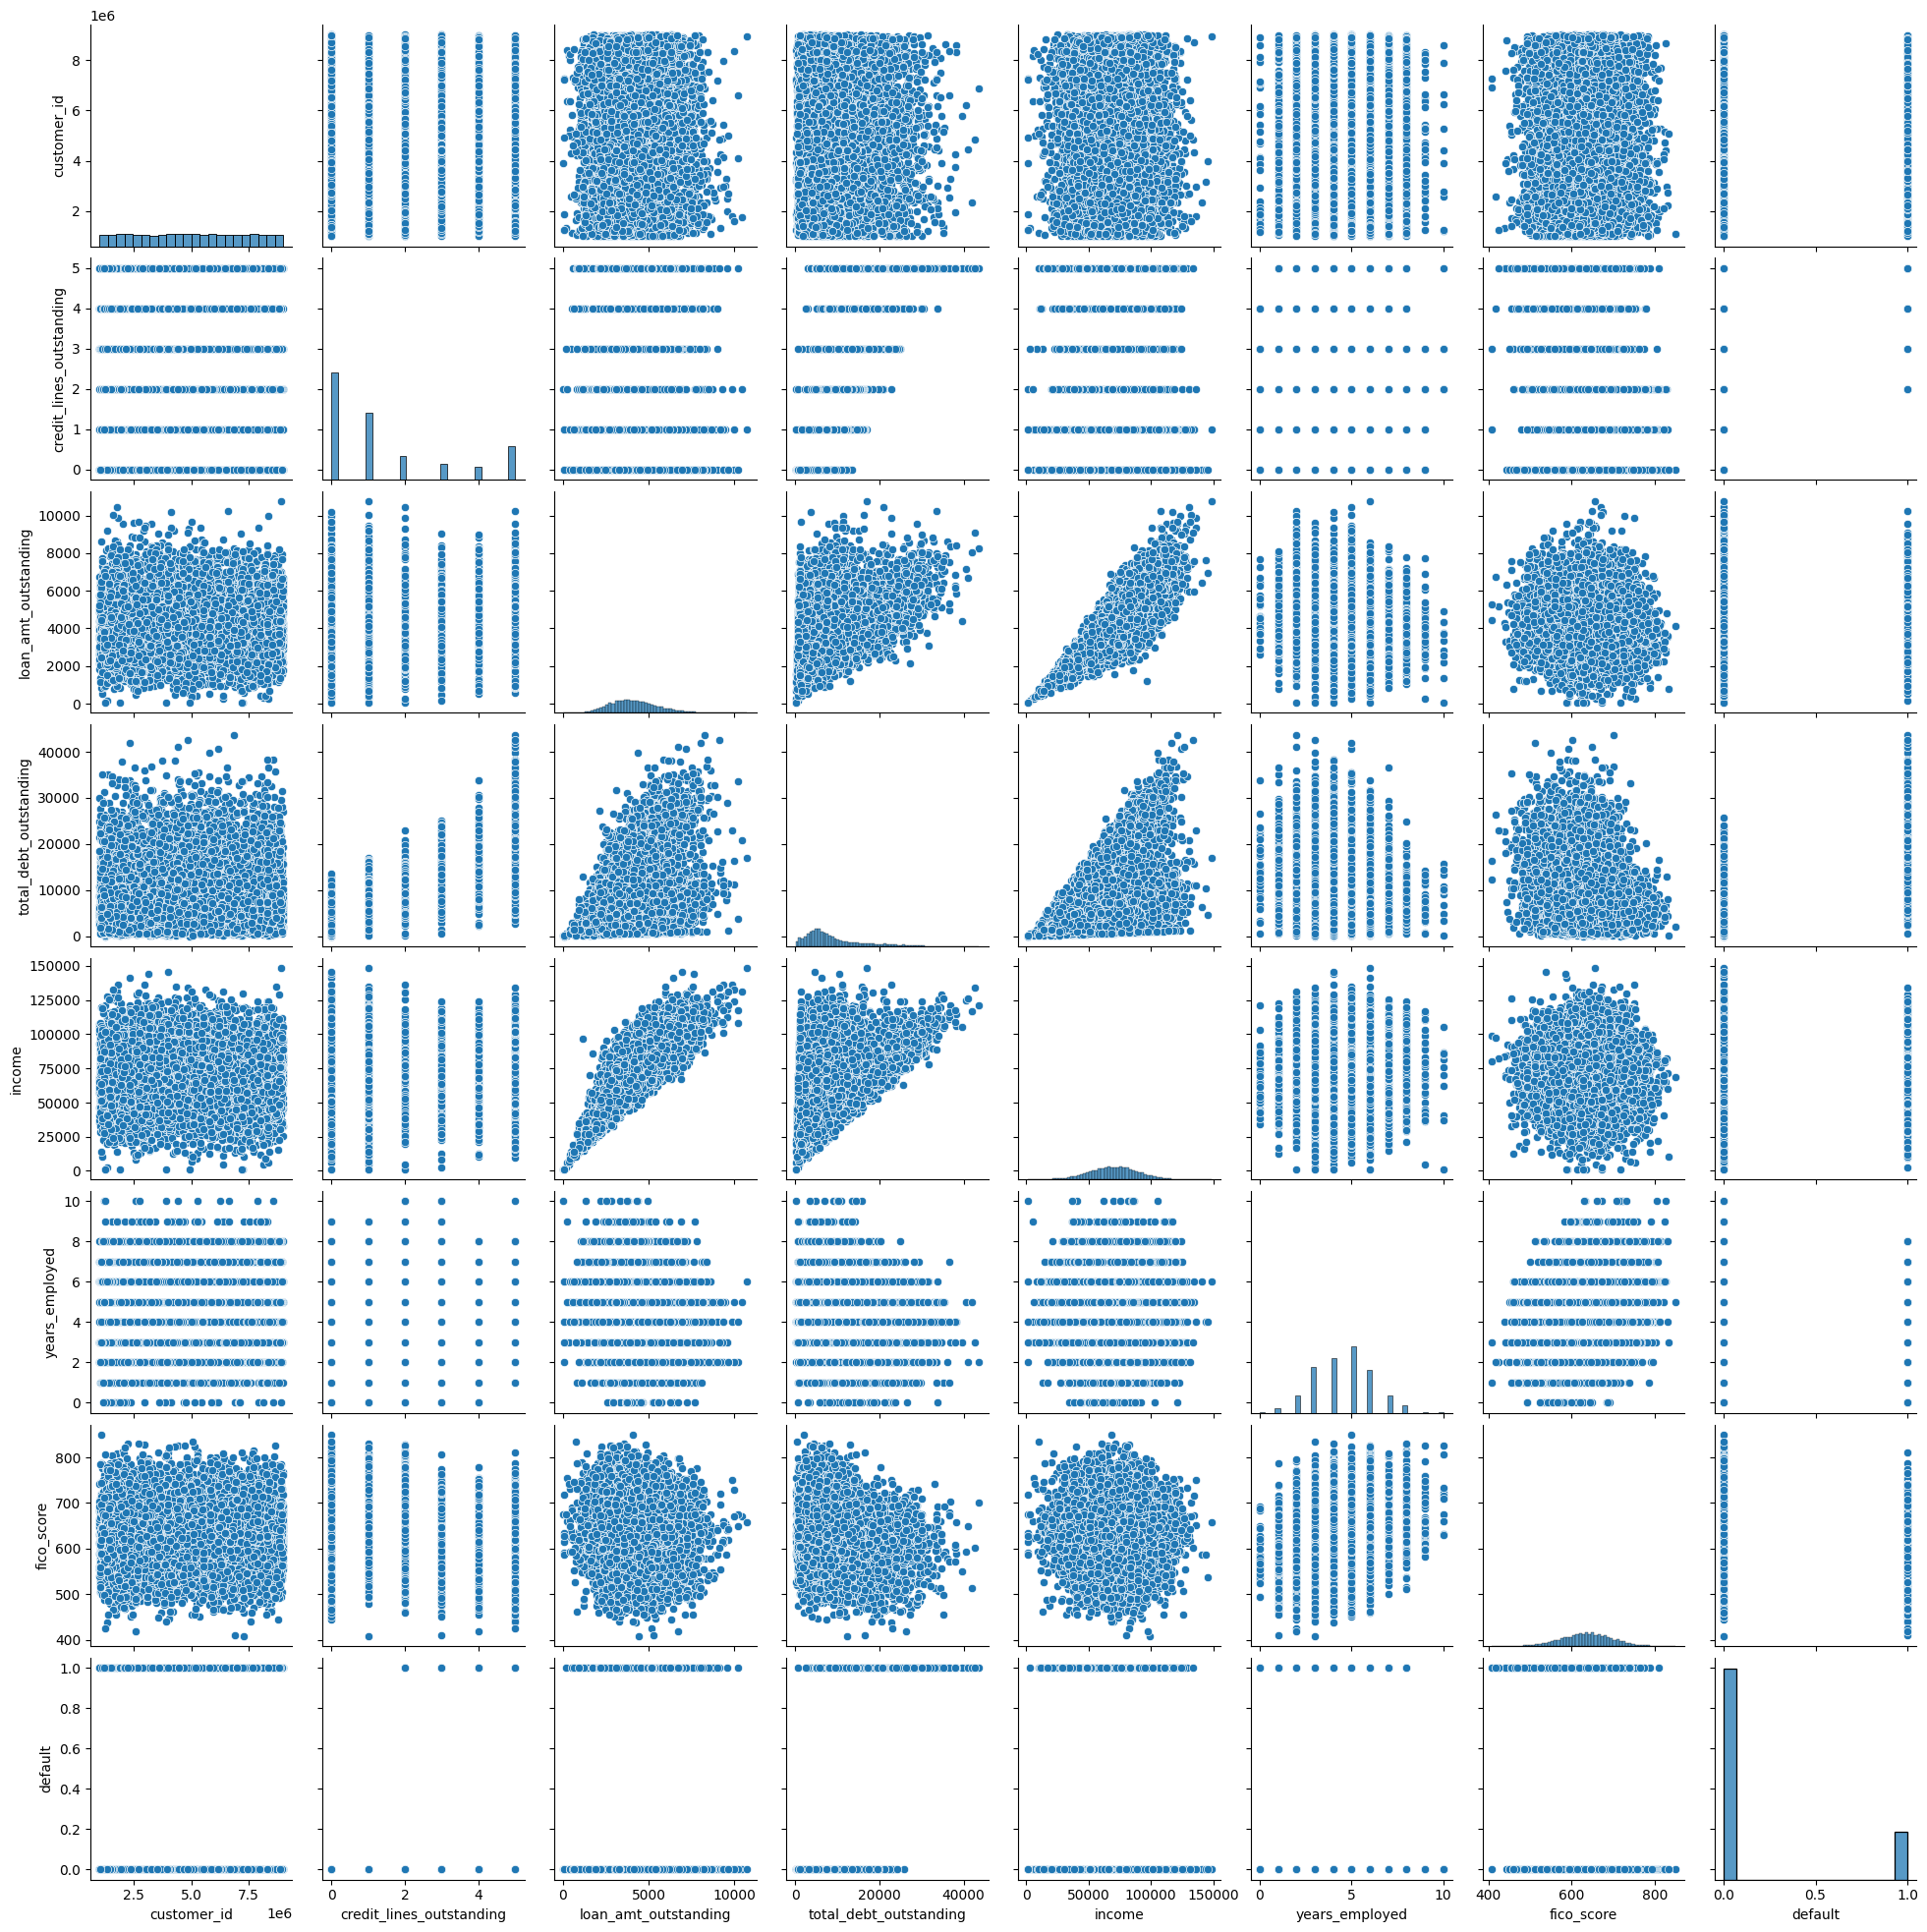

In [ ]:
sns.pairplot(df_2)

<Axes: >

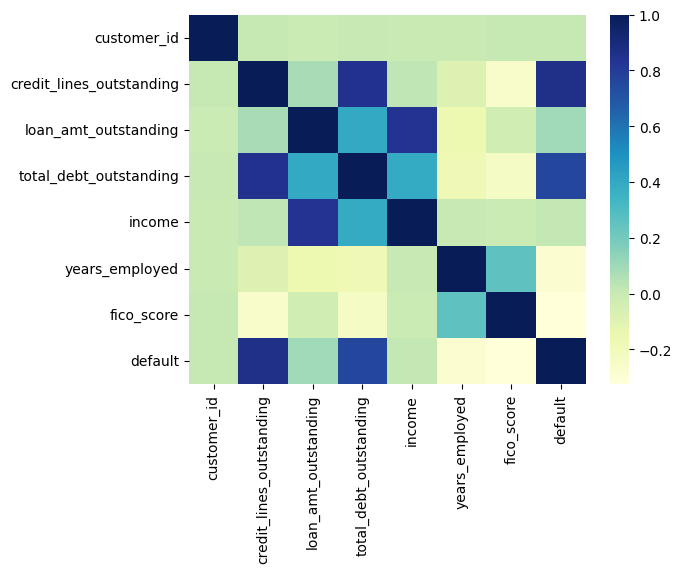

In [ ]:
correl = df_2.corr()

sns.heatmap(correl, cmap="YlGnBu")

<Axes: >

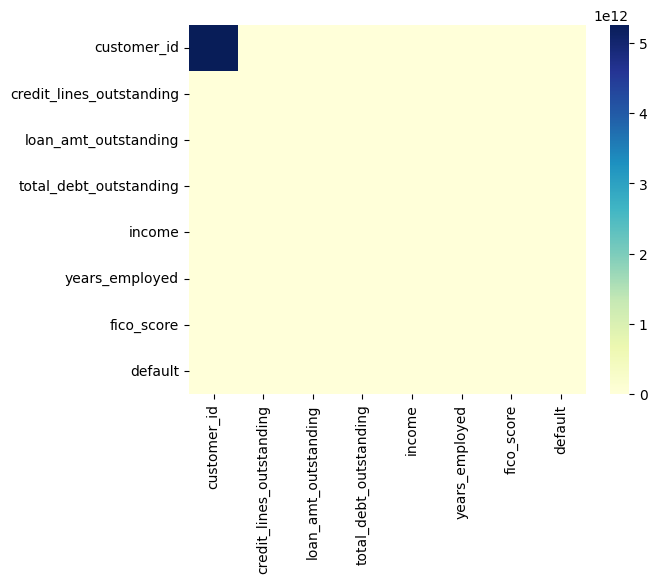

In [ ]:
covar = df_2.cov()

sns.heatmap(covar, cmap="YlGnBu")

Cleaning the data

In [ ]:
df_3 = df_2.drop(['customer_id','credit_lines_outstanding','loan_amt_outstanding', 'years_employed'], axis=1, inplace=False)



<Axes: >

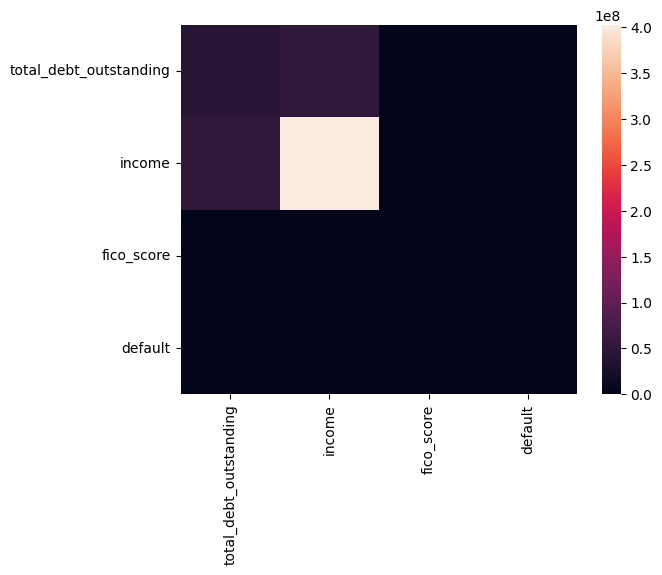

In [ ]:
covar_df3 = df_3.cov()

sns.heatmap(covar_df3)

Machine Learning - Decision Trees to predict

In [ ]:
 #function that can take in the properties of a loan and output the expected loss.


In [ ]:
 #decision tree
 from sklearn.model_selection import train_test_split
 from sklearn.tree import DecisionTreeClassifier

In [ ]:
 dt = DecisionTreeClassifier(random_state=42)

In [ ]:
X = df_3
y = df_2['years_employed']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_dt = dt.predict(X_test)

In [ ]:
accuracy_train = dt.score(X_train, y_train)
print(f"Accuracy on the training set: {accuracy_train:.0%}")

Accuracy on the training set: 100%


In [ ]:
accuracy_test = dt.score(X_test,y_test)
print(f"Accuracy on the test set: {accuracy_test:.0%}")

Accuracy on the test set: 20%


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<Axes: >

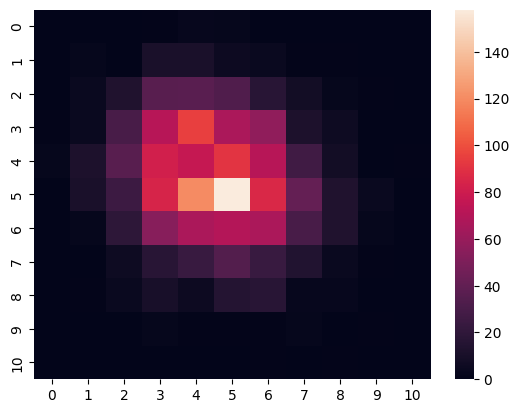

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_dt))

In [ ]:
print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.06      0.06      0.06        35
           2       0.10      0.09      0.09       151
           3       0.19      0.21      0.20       343
           4       0.17      0.19      0.18       407
           5       0.33      0.29      0.31       542
           6       0.19      0.21      0.20       324
           7       0.10      0.11      0.11       124
           8       0.06      0.05      0.06        58
           9       0.11      0.12      0.12         8
          10       0.00      0.00      0.00         2

    accuracy                           0.20      2000
   macro avg       0.12      0.12      0.12      2000
weighted avg       0.21      0.20      0.20      2000



In [ ]:
dt.get_depth

<bound method BaseDecisionTree.get_depth of DecisionTreeClassifier(random_state=42)>

In [ ]:
dt.tree_.compute_feature_importances(normalize=False)


array([0.2917538 , 0.2932236 , 0.22555537, 0.00941251])

In [ ]:
from sklearn import tree


In [ ]:
print(dt.tree_.node_count)
print(dt.tree_.children_left)
print(dt.tree_.children_right)
print(dt.tree_.feature)
print(dt.tree_.threshold)
print(dt.tree_.value)

9437
[ 1  2  3 ... -1 -1 -1]
[7772 3405 1192 ...   -1   -1   -1]
[ 3  2  2 ... -2 -2 -2]
[ 5.000e-01  6.385e+02  5.895e+02 ... -2.000e+00 -2.000e+00 -2.000e+00]
[[[ 26. 129. 537. ... 217.  35.   9.]]

 [[ 10.  56. 350. ... 207.  35.   9.]]

 [[  6.  27. 175. ...  57.  15.   2.]]

 ...

 [[  1.   0.   0. ...   0.   0.   0.]]

 [[  0.   0.   0. ...   0.   0.   0.]]

 [[  0.   0.   2. ...   0.   0.   0.]]]


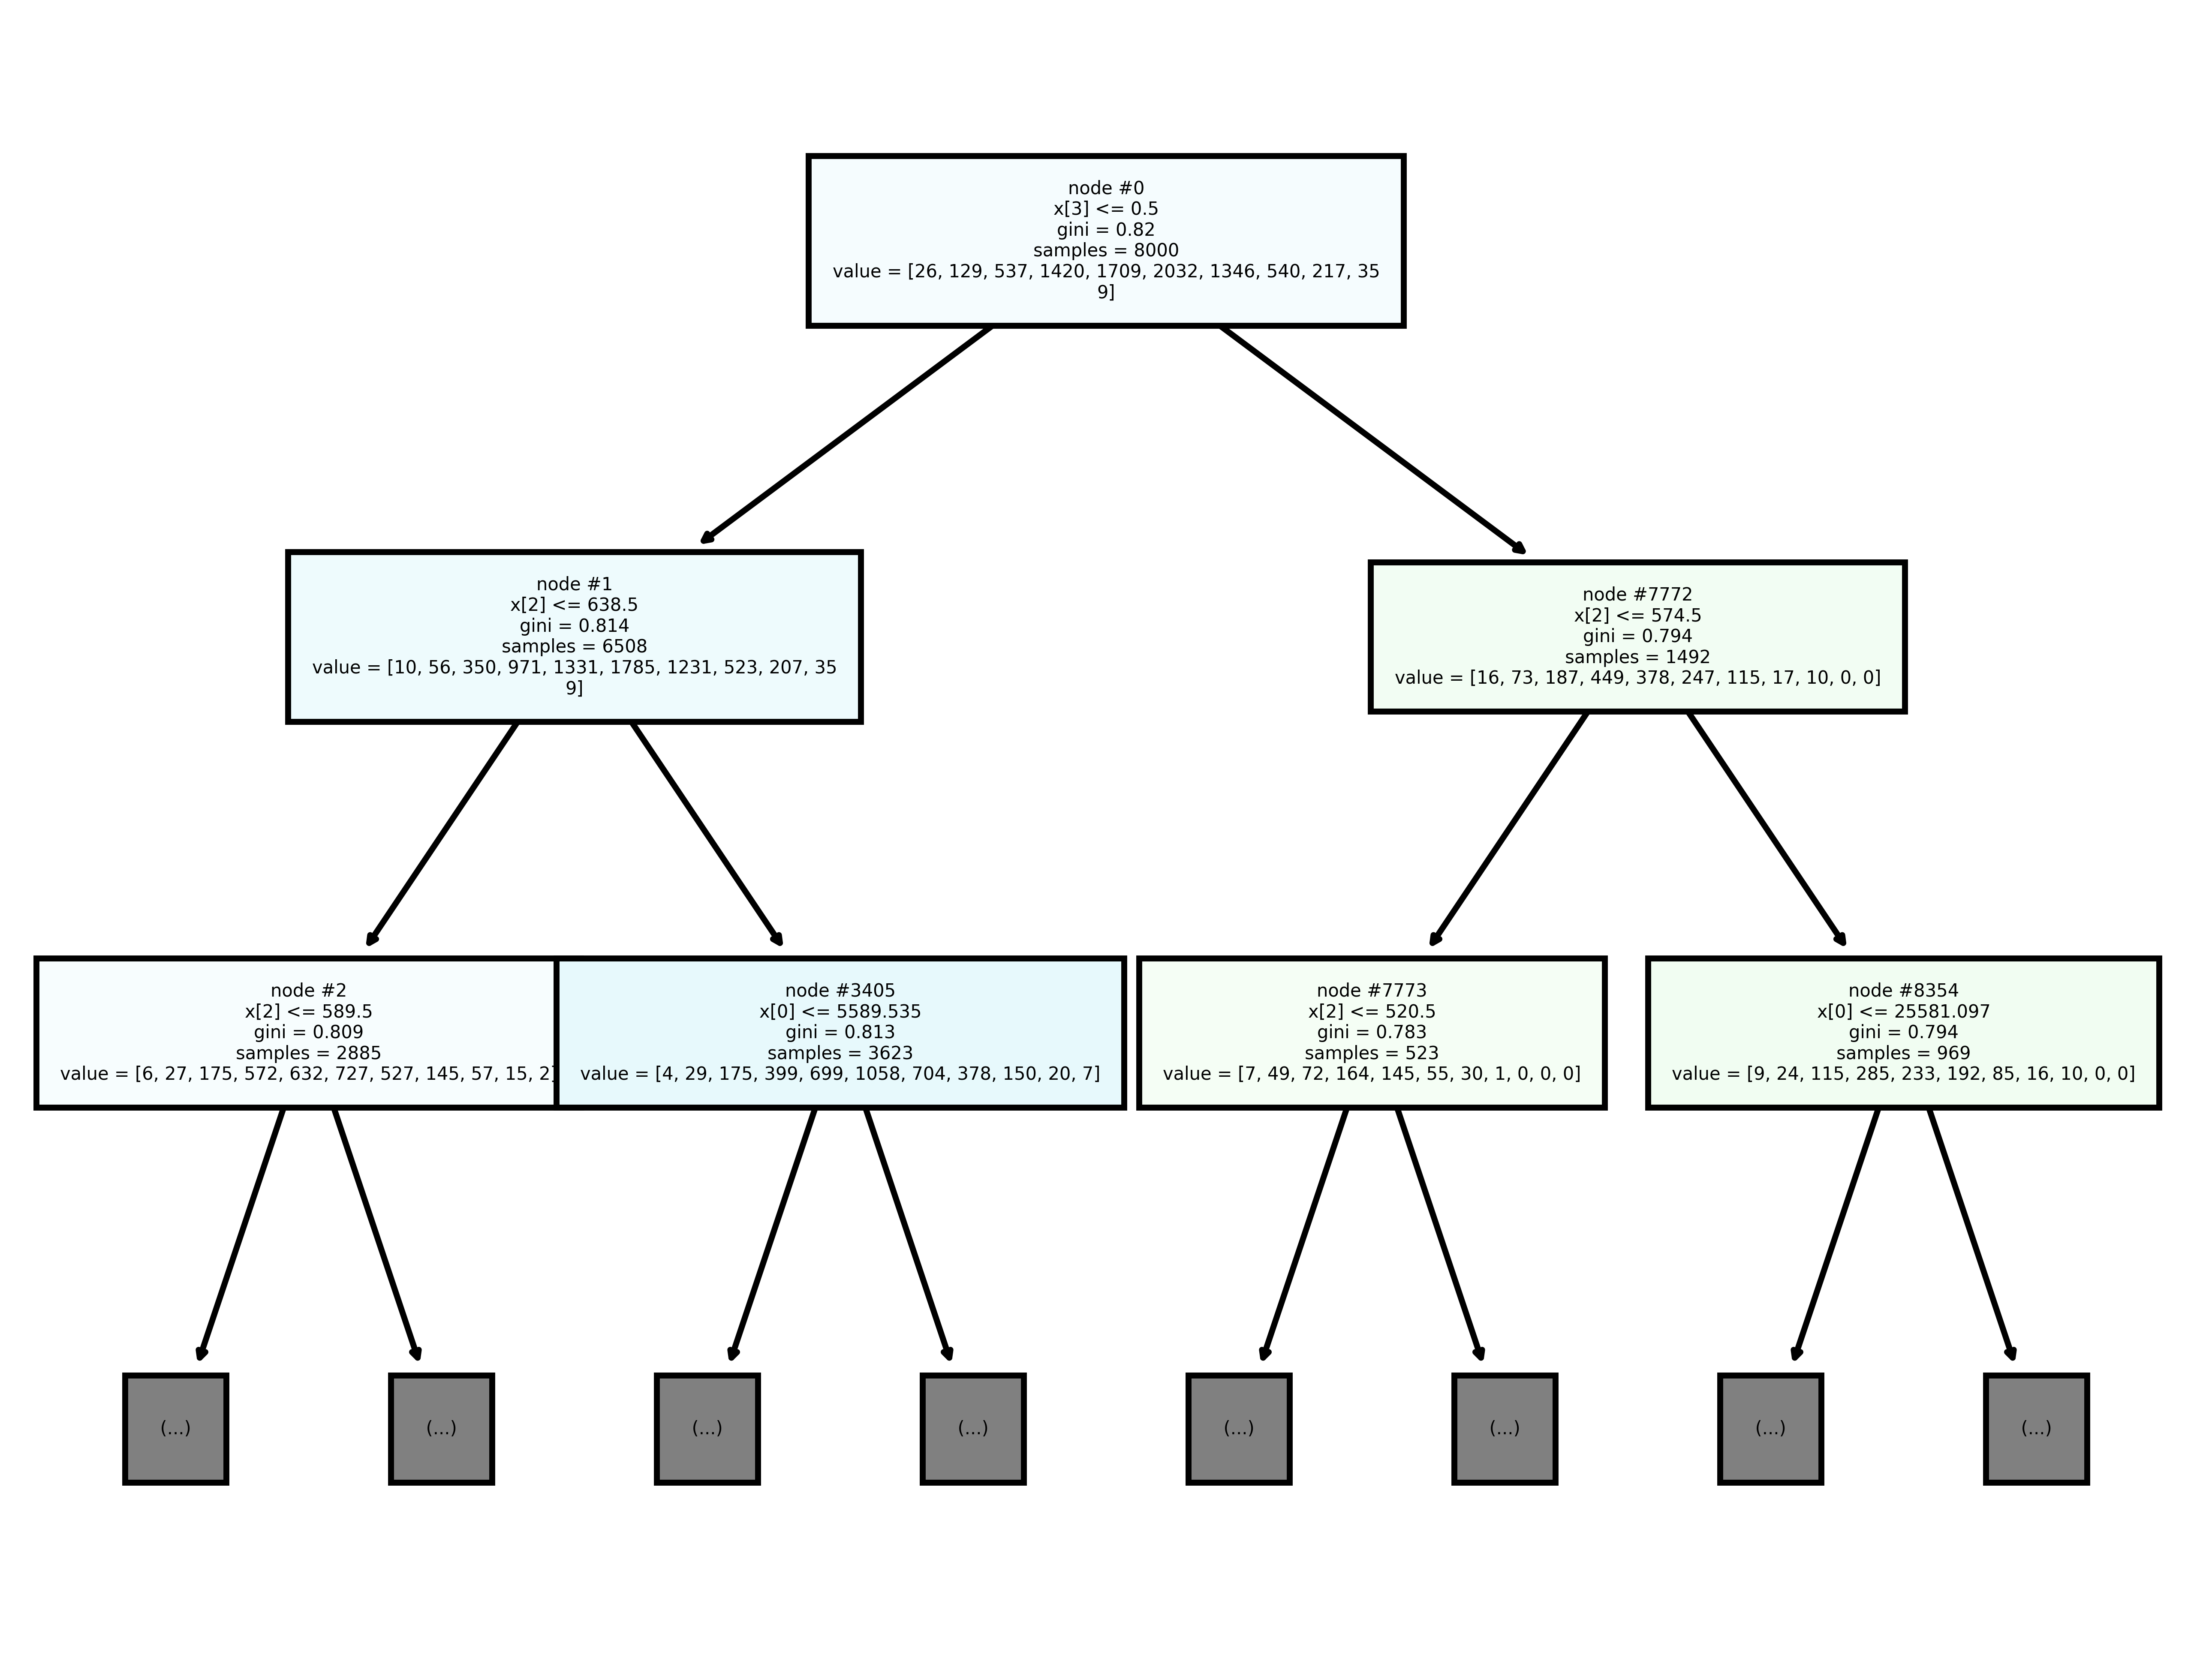

In [ ]:
plt.rcParams["figure.dpi"] = 1000
fig, ax = plt.subplots()
plot_tree(dt, max_depth=2,node_ids=True,
    filled=True, fontsize=3)
plt.show()

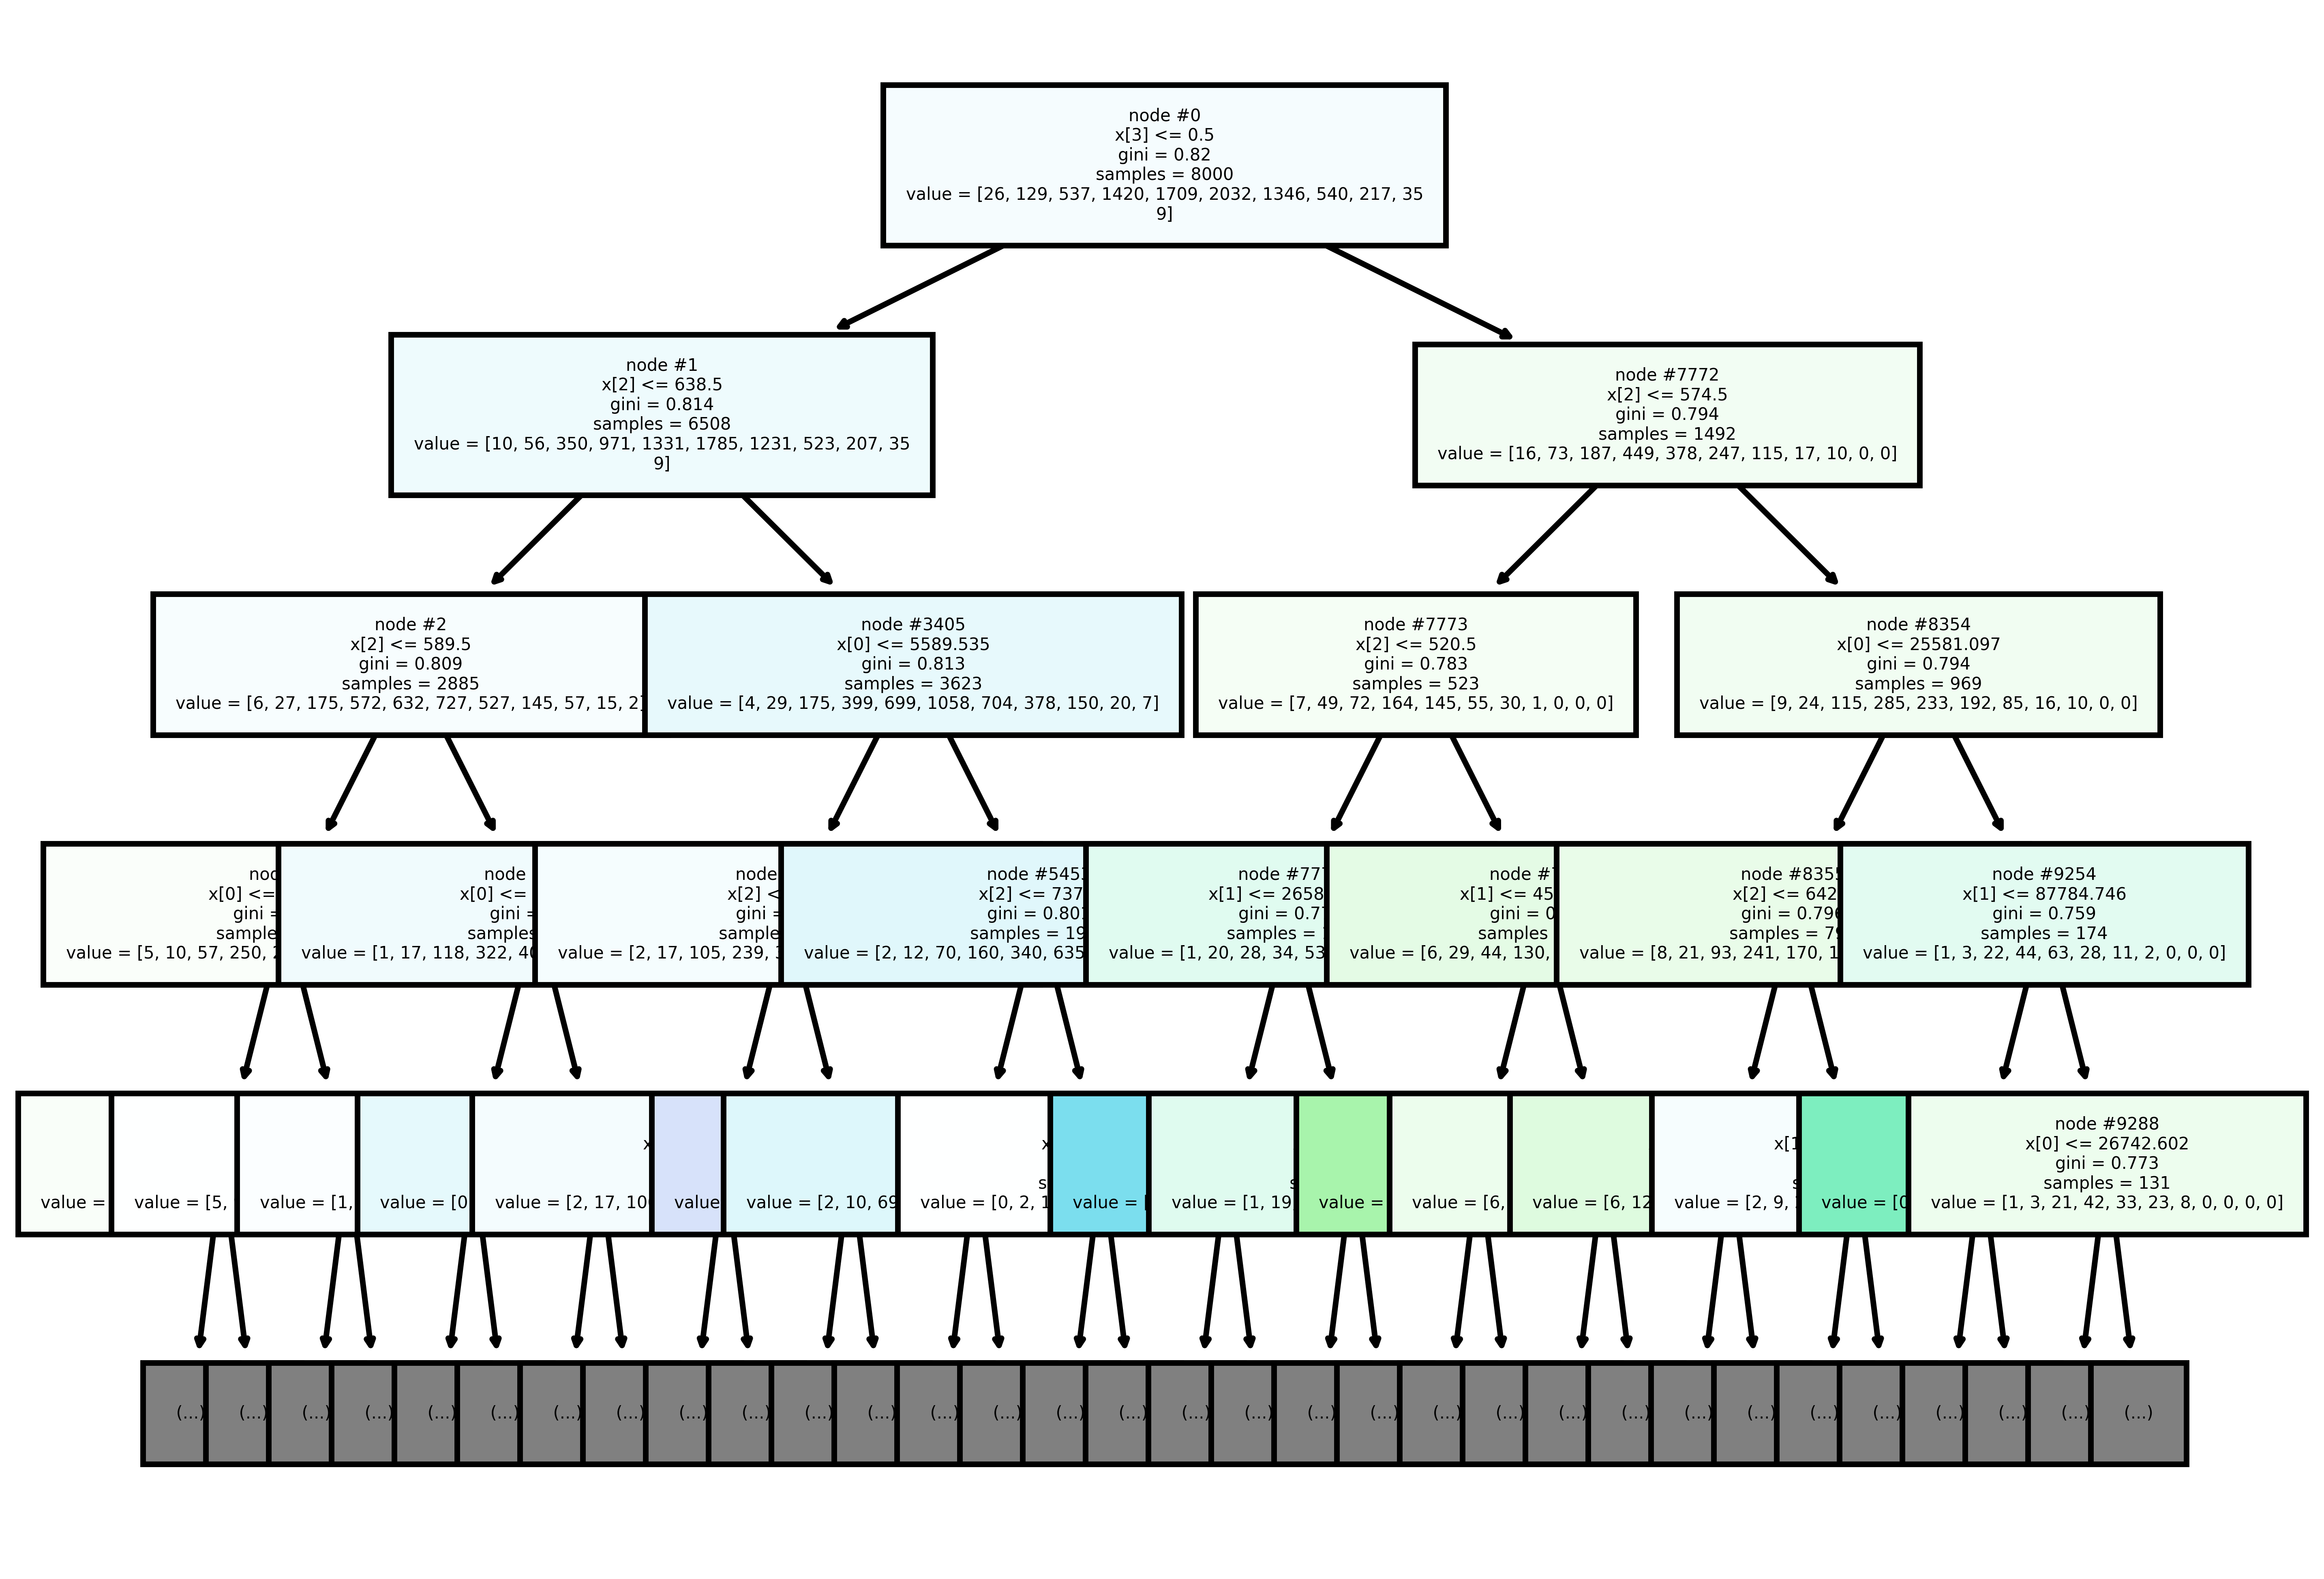

In [ ]:
plt.rcParams["figure.dpi"] = 1000
fig, ax = plt.subplots()
plot_tree(dt, max_depth=4,node_ids=True,
    filled=True , fontsize=3)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
'''
clf = GradientBoostingClassifier(random_state=42)
# Train the model
clf.fit(X_train, y_train)

# Evaluate accuracy on train and test sets
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, clf.predict(X_test))

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
'''